In [1]:
import cv2
import numpy as np

In [5]:

# Step 1: Read image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # OpenCV uses BGR format by default

# Step 2: Convert image to NumPy array (OpenCV does this automatically when reading)
image_array = np.array(gray_image)
print(type(image_array))
print(image_array.shape)
print(image_array[0])
#print(image_array)

# Step 3: Convert NumPy array back to image
image_converted = image_array

# # Step 4: Save or display the new image
# cv2.imwrite('converted_image.jpg', image_converted)
# cv2.imshow('Image', image_converted)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


<class 'numpy.ndarray'>
(28, 28)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Natural cubic spline and evaluate_spline function (from your provided code)
def natural_cubic_spline(x, a):
    n = len(x) - 1
    h = np.diff(x)

    alpha = np.zeros(n)
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (a[i+1] - a[i]) - (3/h[i-1]) * (a[i] - a[i-1])

    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    c = np.zeros(n + 1)
    b = np.zeros(n)
    d = np.zeros(n)

    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    l[n] = 1
    z[n] = 0
    c[n] = 0

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])

    return a[:-1], b, c[:-1], d

def evaluate_spline(x_vals, a, b, c, d, x_points):
    n = len(x_vals) - 1
    spline_x = np.array([])
    spline_y = np.array([])

    for i in range(n):
        x_range = np.linspace(x_vals[i], x_vals[i+1], 100)
        spline_x = np.append(spline_x, x_range)
        spline_y = np.append(
            spline_y,
            a[i] + b[i] * (x_range - x_vals[i]) +
            c[i] * (x_range - x_vals[i]) ** 2 +
            d[i] * (x_range - x_vals[i]) ** 3
        )
    return spline_x, spline_y

# Function to apply spline interpolation to 2D image
def interpolate_image(image_array):
    # Step 1: Interpolate along rows
    interpolated_rows = []
    x_vals = np.arange(image_array.shape[1])
    
    for row in image_array:
        a, b, c, d = natural_cubic_spline(x_vals, row)
        spline_x, spline_y = evaluate_spline(x_vals, a, b, c, d, x_vals)
        interpolated_rows.append(spline_y)
    
    interpolated_rows = np.array(interpolated_rows)

    # Step 2: Interpolate along columns
    interpolated_image = []
    x_vals = np.arange(interpolated_rows.shape[0])

    for i in range(interpolated_rows.shape[1]):
        a, b, c, d = natural_cubic_spline(x_vals, interpolated_rows[:, i])
        spline_x, spline_y = evaluate_spline(x_vals, a, b, c, d, x_vals)
        interpolated_image.append(spline_y)

    interpolated_image = np.array(interpolated_image).T  # Transpose to get correct shape
    return interpolated_image

# Step 3: Load and process the image
image = cv2.imread('testing.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_array = np.array(gray_image)

# Step 4: Apply interpolation
interpolated_image = interpolate_image(image_array)

# Step 5: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()


C:\Users\SOHAIB\AppData\Local\Temp\ipykernel_23008\2651214619.py:12: RuntimeWarning: overflow encountered in scalar subtract
  alpha[i] = (3/h[i]) * (a[i+1] - a[i]) - (3/h[i-1]) * (a[i] - a[i-1])
C:\Users\SOHAIB\AppData\Local\Temp\ipykernel_23008\2651214619.py:32: RuntimeWarning: overflow encountered in scalar subtract
  b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3


KeyboardInterrupt: 

C:\Users\SOHAIB\AppData\Local\Temp\ipykernel_23008\968369973.py:17: RuntimeWarning: invalid value encountered in scalar divide
  delta1 = (a[i+1] - a[i]) / np.max(np.abs(a))  # normalize to avoid large numbers
C:\Users\SOHAIB\AppData\Local\Temp\ipykernel_23008\968369973.py:18: RuntimeWarning: invalid value encountered in scalar divide
  delta2 = (a[i] - a[i-1]) / np.max(np.abs(a))


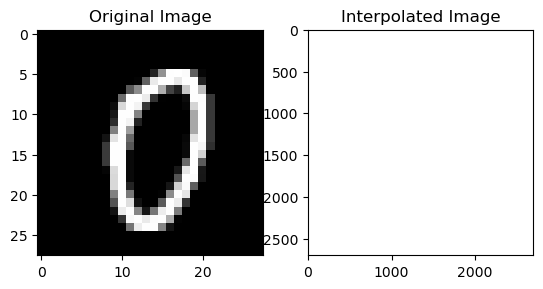

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Natural cubic spline with additional overflow checks and normalization
def natural_cubic_spline(x, a):
    n = len(x) - 1
    h = np.diff(x)

    alpha = np.zeros(n)
    for i in range(1, n):
        if h[i] == 0 or h[i-1] == 0:
            alpha[i] = 0
        else:
            # Normalize the differences by a scaling factor
            delta1 = (a[i+1] - a[i]) / np.max(np.abs(a))  # normalize to avoid large numbers
            delta2 = (a[i] - a[i-1]) / np.max(np.abs(a))
            alpha[i] = (3/h[i]) * delta1 - (3/h[i-1]) * delta2

    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    c = np.zeros(n + 1)
    b = np.zeros(n)
    d = np.zeros(n)

    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        if l[i] == 0:
            mu[i] = 0
            z[i] = 0
        else:
            mu[i] = h[i] / l[i]
            z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    l[n] = 1
    z[n] = 0
    c[n] = 0

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        if h[j] == 0:
            b[j] = 0
            d[j] = 0
        else:
            b[j] = ((a[j+1] - a[j]) / h[j]) - h[j] * (c[j+1] + 2 * c[j]) / 3
            d[j] = (c[j+1] - c[j]) / (3 * h[j])

    return a[:-1], b, c[:-1], d

# Function to apply spline interpolation to 2D image
def interpolate_image(image_array):
    # Normalize pixel values to range [0, 1]
    image_array = image_array / 255.0
    
    # Step 1: Interpolate along rows
    interpolated_rows = []
    x_vals = np.arange(image_array.shape[1])
    
    for row in image_array:
        a, b, c, d = natural_cubic_spline(x_vals, row)
        spline_x, spline_y = evaluate_spline(x_vals, a, b, c, d, x_vals)
        interpolated_rows.append(spline_y)
    
    interpolated_rows = np.array(interpolated_rows)

    # Step 2: Interpolate along columns
    interpolated_image = []
    x_vals = np.arange(interpolated_rows.shape[0])

    for i in range(interpolated_rows.shape[1]):
        a, b, c, d = natural_cubic_spline(x_vals, interpolated_rows[:, i])
        spline_x, spline_y = evaluate_spline(x_vals, a, b, c, d, x_vals)
        interpolated_image.append(spline_y)

    interpolated_image = np.array(interpolated_image).T  # Transpose to get correct shape
    
    # De-normalize the image back to the original range [0, 255]
    interpolated_image = np.clip(interpolated_image * 255, 0, 255)
    
    return interpolated_image

# Step 3: Load and process the image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image_array = np.array(gray_image)  # Ensure you're working with a 2D grayscale image

# Step 4: Apply interpolation
interpolated_image = interpolate_image(image_array)

# Step 5: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()


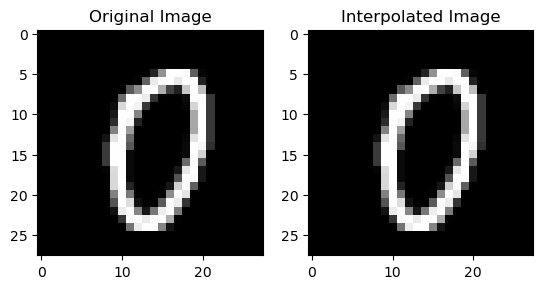

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to compute divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # the first column is y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]  # return only the first row (Newton's coefficients)

# Function to evaluate Newton polynomial at given points
def newton_poly(x, x_data, coef):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

# Function to interpolate 1D data using Newton's method
def interpolate_1d(x_vals, y_vals, new_x_vals):
    coef = divided_diff(x_vals, y_vals)
    return newton_poly(new_x_vals, x_vals, coef)

# Function to apply Newton's interpolation to 2D image
def interpolate_image_newton(image_array):
    # Step 1: Interpolate along rows
    interpolated_rows = []
    x_vals = np.arange(image_array.shape[1])  # Original x-values
    
    for row in image_array:
        new_x_vals = np.linspace(0, image_array.shape[1] - 1, num=image_array.shape[1])  # Generate new x-values
        interpolated_row = interpolate_1d(x_vals, row, new_x_vals)
        interpolated_rows.append(interpolated_row)
    
    interpolated_rows = np.array(interpolated_rows)

    # Step 2: Interpolate along columns
    interpolated_image = []
    x_vals = np.arange(interpolated_rows.shape[0])

    for i in range(interpolated_rows.shape[1]):
        new_x_vals = np.linspace(0, interpolated_rows.shape[0] - 1, num=interpolated_rows.shape[0])
        interpolated_column = interpolate_1d(x_vals, interpolated_rows[:, i], new_x_vals)
        interpolated_image.append(interpolated_column)

    interpolated_image = np.array(interpolated_image).T  # Transpose to get correct shape
    
    return interpolated_image

# Step 3: Load and process the image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image_array = np.array(gray_image)  # Ensure you're working with a 2D grayscale image

# Step 4: Apply Newton's interpolation
interpolated_image = interpolate_image_newton(image_array)

# Step 5: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()
